In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import matplotlib; matplotlib.rcParams['figure.figsize'] = (8,3)

In [2]:
import numpy as np

In [3]:
# Reload all packages - make debugging easier
%load_ext autoreload
%autoreload 2

---

In [4]:
from nnmf_svi_eddie import NNMF

---

In [5]:
import sys 
sys.path.append('..')

from movieLensAnalyzer import MovieLensAnalyzer 
movieLensAnalyzer = MovieLensAnalyzer()
R = movieLensAnalyzer.trainRatingMatrix # take some matrix... just check if it trains and if so how quickly

In [6]:
model = NNMF(ratings_matrix=R, D=50, Dp=50, HIDDEN_UNITS=100,
                               batch_size=200, n_samples=10)

In [7]:
def score():
    # For now, just some mse of random users.
    mses = []
    for user_index in [0,11,20,30]:
        print('User', user_index)
        idx = np.where(R[user_index] > 0)
        rhats = np.mean(model.sample_user_ratings(user_index), axis=0)[idx]
        r = R[user_index][idx]
        print(np.round(rhats[:10]))
        print(r[:10])
        mses.append(np.mean(np.square(rhats - r)))
    return mses

score()

User 0
[ 2.  2.  1.  2.  2.  2.  2.  2.  1.  1.]
[ 5.  3.  4.  3.  4.  1.  5.  3.  2.  5.]
User 11
[ 1.  2.  0.  2.  2.  2.  1.  2.  1.  1.]
[ 5.  5.  5.  4.  5.  4.  4.  5.  4.  5.]
User 20
[ 2.  1.  1.  1.  1.  1.  1.  1.  1.  2.]
[ 5.  2.  5.  5.  4.  4.  3.  4.  5.  5.]
User 30
[ 2.  2.  1.  2.  2.  2.  2.  2.  1.  1.]
[ 5.  2.  4.  4.  5.  4.  5.  4.  5.  3.]


[6.2663512435422097,
 10.382849317959224,
 4.1955976864962281,
 5.9459757177964052]

In [8]:
mask = R>0

CPU times: user 2min 37s, sys: 24.5 s, total: 3min 1s
Wall time: 1min 2s


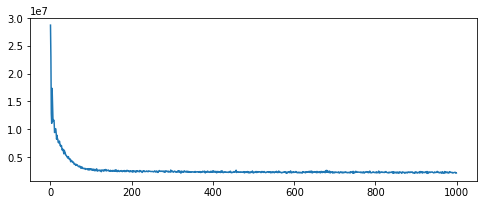

In [9]:
%time losses = model.train(mask=mask, verbose=True)
plt.plot(losses)

In [10]:
score()

User 0
[ 4.  3.  3.  4.  4.  4.  4.  4.  4.  4.]
[ 5.  3.  4.  3.  4.  1.  5.  3.  2.  5.]
User 11
[ 4.  4.  4.  5.  4.  4.  4.  4.  4.  4.]
[ 5.  5.  5.  4.  5.  4.  4.  5.  4.  5.]
User 20
[ 3.  3.  3.  4.  4.  3.  4.  3.  4.  4.]
[ 5.  2.  5.  5.  4.  4.  3.  4.  5.  5.]
User 30
[ 4.  4.  4.  4.  4.  4.  4.  4.  4.  4.]
[ 5.  2.  4.  4.  5.  4.  5.  4.  5.  3.]


[0.92267447333236563,
 0.63872528246445559,
 1.0331920377486974,
 0.80110737861458858]